# Introduction
In this practical we'll look at a powerful, and well-known Python library called scikit-learn. This is accessed programmatically using Python code, so has a steeper learning curve than Orange's GUI-driven approach, but is more flexible and powerful.

Orange actually makes use of this library for some of its modelling; Orange can also be called programmatically via an API, but scikit-learn is very popular and worth knowing about in its own right.

scikit-learn uses pandas and numpy objects to contain the raw data, so we'll begin by importing them and loading the data (the motor premiums data from Practical 2)...

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv("MotorPremiums.csv")

Let's take a look at the data before doing anything else...

In [19]:
df.head()
for col in df:
    print(f"{col}: {sorted(df[col].unique())}")

Age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Gender: ['F', 'M']
Yrs DL: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63]
Points: [0, 4, 8]
NCD: [0, 1, 2, 3, 4]
Engine cc: [1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3800]
Ins Group: [2, 3, 4, 5, 6, 7, 8]
Stored: ['Drive', 'Garage', 'Road']
Car Age: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Premium: [154.2192795, 155.4582048, 157.2248133, 158.4182338, 159.8186118, 160.204219, 160.8619547, 161.1019256, 162.0248133, 162.3976411, 163.6325304, 164.5587396, 164.5633203, 164.9919451, 166.0634845, 166.228036

This data set is nice and clean. Many real-world data sets have missing or outlier values, duplicates, corrupted strings or some other noise that can cause trouble for our models. It would be worth doing some further reading on approaches to cleaning data in Python (building on what you learned in ITNPBD2 if you were on that module). A couple of good guides are:

(https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3)
(https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch04.html)


As well as the scikit-learn documentation on preprocessing: (https://scikit-learn.org/stable/modules/preprocessing.html)

# Encoding variables

Note that a few of the variables above are not numeric: *Gender* and *Stored* are strings. For the model to work with this data, we'll need to convert these variables to numeric values. sklearn provides a couple of encoders to do this:
* sklearn.preprocessing.OrdinalEncoder - for string variables where there is a natural order to the values (e.g. "light"/"medium"/"heavy") - *ordinal* variables - this will transform the values into 0,1,2,3...
* sklearn.preprocessing.OneHotEncoder - for string variables where there is no natural order to the values (e.g. place names, job titles) - *nominal* or *categorical* variables - this will create a new feature for each possible value, with the value 0 or 1.

Read more about the encoders [here](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) and how you might combined them for mixed-type data [here](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html).

In our data, *Gender* and *Stored* do not have a natural order, so we want one-hot encoding. While the encoders above are arguably more flexible, a simpler way to apply one-hot encoding is built in to pandas, and that's what we'll use...

In [8]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

This function takes a data frame and returns another data frame with the transformation applied. The argument *prefix_sep='_'* is used to make the names of the newly created features;  *drop_first=True* removes one column from the resulting dummy features; this is to avoid multicollinearity, which can be a [problem](https://www.algosome.com/articles/dummy-variable-trap-regression.html) for some model types. Let's take a look at the data now:

In [10]:
df.head()

array(['Garage', 'Road', 'Drive'], dtype=object)

You can see that we've now created some extra columns in place of Gender and Stored.

# Set the features and targets
We can now extract the columns we want for features and targets as numpy arrays ready for passing to a model. By convention, we use `X` as the 2-D array of features, and `y` as the 1-D array of targets.

# Normalising
It's also a good idea to normalise the features: ensuring they are all in the range 0...1. The simplest approach is, for each feature, to subtract the minimum value and divide by the range. This can be done as follows:

[[52 16  0 ...  1  1  0]
 [46 22  8 ...  0  1  0]
 [59  9  0 ...  0  1  0]
 ...
 [50 32  0 ...  1  0  1]
 [36 12  8 ...  0  0  1]
 [36  2  0 ...  0  0  0]]
[[0.5483871  0.24193548 0.         ... 1.         1.         0.        ]
 [0.4516129  0.33870968 1.         ... 0.         1.         0.        ]
 [0.66129032 0.12903226 0.         ... 0.         1.         0.        ]
 ...
 [0.51612903 0.5        0.         ... 1.         0.         1.        ]
 [0.29032258 0.17741935 1.         ... 0.         0.         1.        ]
 [0.29032258 0.01612903 0.         ... 0.         0.         0.        ]]


Should you later want to apply the same scaling to new data, this can be doner by calling `mm_scaler.transform(X_test)`, where `X_test` is the variable holding the new data set. The same can be done with the encoders.

# A simple regression model

One more thing before we get to build a model: split into training and test data so we have something to check the model against later...

Now let's have a go at fitting a model to our data. We'll try a multilayer perceptron first...

MLPRegressor(alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.01,
             max_iter=1000, random_state=1)

How did it do? Let's apply the model to the test data and see...

19.112645431317333


Text(0, 0.5, 'Predictions')

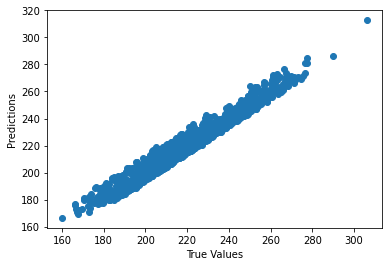

Go back and try a few different values for the MLPRegressor hyperparameters. Do any of them seem to make much difference? Now, in the cell below try a DecisionTreeRegressor. Does it perform better or worse?

44.31489738605887


Text(0, 0.5, 'Predictions')

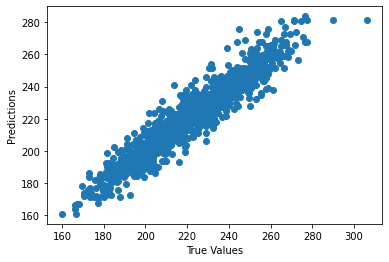

19.11985654347608


Text(0, 0.5, 'Predictions')

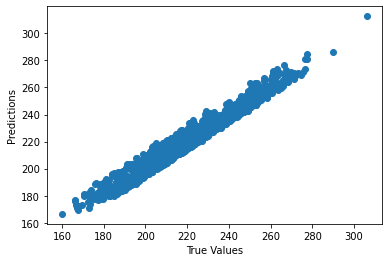

# Cross-fold validation
Above we were doing a simple train/test split to work out the quality of our model. Really, we should be using a validation set to choose and configure our model, only falling back on the test data at the end. Fortunately there are helper methods in sklearn for cross-fold validation. By default these call the `score` method of the model to measure model quality on each fold; `score()` works differently per model but the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score) will tell you that for an MLPRegressor it's the R^2 value, which would be 1.0 for a perfect model. If you want to use a different measure like mean square error (as we did above) you can specify which one you want from the list [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

Here's how to perform the cross-fold validation, using 5 folds of our training set. We get a list of scores back in which each element is the score for one fold. We usually aggregate these (e.g. take the average) to get one overall score. You'll see the scores are negative: this is deliberate, and is so a "bigger" score (smaller error) is "better".

[-22.73769525 -19.53613908 -18.45358371 -19.99107359 -22.02969514]
-20.549637353056546


# Tuning hyperparameters
As we saw with Orange previously, there are many hyperparameters, and tuning them for a particular application is a laborious process. Fortunately, it's also easy to automate!...

The process is that we create a new model object, an object specifying how the data should be split for evaluating the model, and a list of the parameters we want to explore.

First, the model:

Next, specify that we'll be using cross-fold validation with 5 splits...

Now the MLP the parameters to tune, and the values that can be tried.
A full list of parameters is [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

Now we use a grid search to explore all the possible combinations of parameters. This will take at least a couple of minutes to run as it is trying a lot of parameter combinations, multiplied by the k folds of cross validation. 

If you have many parameters to tune, this will take too long. An alternative is RandomizedSearchCV, which searches a subset of parameter values chosen at random. Or you could write a script to implement something more sophisticated like a hillclimber (usually this is excessive though).

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Once that's done, we can get the model with the best configuration from the grid search. We can also get an explicit list of the best parameter values, and confirm the quality of our model by calling `score()` (as noted above this is the R^2 value).

Parameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}
R^2 on training set: 0.9994186760549538
R^2 on test set: 0.9992741506272113


You should get values well over 0.9 for this, even for the unseen test data. This is very good. Let's try repeating the test we did earlier on our tuned model:

0.34377982068000684


Text(0, 0.5, 'Predictions')

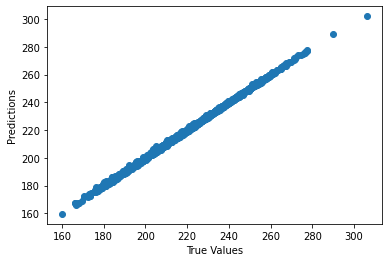

Mean squared error is now much smaller, and the predictions are clearly very close to the true values.

Note: don't always expect models to be this good! Remember, the data was very clean at the start, and was already essentially ready-to-go. Often you might get a plot like the above for training or even validation data, then find a much worse result on the test data (this is overfitting). Equally, you will also often just see that we can't do as well as this, even on the training data. It all depends on the data!

# Selecting Features
Another important part of this process is selecting features. This is to remove any features that hinder model quality: whether due to noise, overfitting, or simply making the model take longer to train. There are three broad approaches to this: filter, embedded and wrapper.

## Filter feature selection
The Filter approach uses a metric computed on each feature to decide which ones to keep. One example, taken from [here](https://scikit-learn.org/stable/modules/feature_selection.html), is to apply a statistical measure such as Chi-square like this:

Original shape: (150, 4)
Updated shape: (150, 2)


## Embedded feature selection
Many models can be inspected to assign an importance to each feature. For example, tree based learners place the model important feature near the root of the tree, with less important features near the leaves. These importances can provide useful insights and can also be used, with a threshold, to select features.

We will now try a simple worked example using the `ExtraTreesClassifier` model. You can read more about this example [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py).

Once you're happy with this one, try applying this approach to the insurance premiums data from above. You'll need to change the model to a tree-based regression model; `ExtraTreesRegressor` is a good one to try. What are the most important features for predicting insurance premiums?

Original shape: (150, 4)
Importances: [0.09132809 0.06477836 0.38523724 0.45865632]
Updated shape: (150, 2)
Ranks: 
sepal width (cm)     0.064778
sepal length (cm)    0.091328
petal length (cm)    0.385237
petal width (cm)     0.458656
dtype: float64


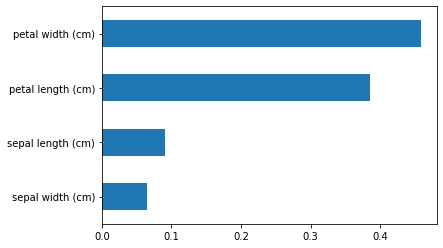

## Wrapper feature selection
A wrapper approach treats feature selection as a search process. We build a model with one set of features selected, then repeat with different sets of features, using the accuracy of the model to guide the search and always keeping the best feature set found so far.

Recursive Feature Elimination (or RFE) is one such approach. It works by starting with all features selected, then recursively removing features and building a model on those attributes that remain. The feature to be removed at each iteration is chosen using coefficients or importances from the model - so with RFE there is an element of an embedded approach too (not all wrapper approaches need to do this, as we'll see below).

You can learn more about RFE [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

Original shape: (150, 4)


TypeError: __init__() takes 2 positional arguments but 3 were given

## Wrapper feature selection - customised
One of the great strengths of accessing a library like sklearn from Python is that, if the library doesn't quite meet your needs, you can write your own code to do the job. _Orange_ will let you embed scripts in a "Script Widget", but running everything in Python gives an extra level of flexibility (and makes deployment easier).

As an example, we'll now try our own approach to wrapper feature selection: a simple hillclimbing algorithm. Most of the time this isn't necessary (including with our trivial examples!), but where there are a large number of features with a lot of non-linearity that might rule out filter approaches or the stepwise wrapper approach above, it can be useful. The same approach could be used to tune hyperparameters too, offering an improvement on random search without the cost of a grid search.

The approach below starts by building the model using all features in the data set. We then choose one or two features to add or remove, and try the model with this updated set of features. If it offers an improvement, we keep it, otherwise we try making a different change. This is repeated for a fixed number of iterations.

Iteration 0


 this:-20.603483115393185
 best:-20.603483115393185
Iteration 1


 this:-12.35190383026613
 best:-12.35190383026613
Iteration 2


 this:-24.37772434767083
 best:-12.35190383026613
Iteration 3


 this:-40.9718131586845
 best:-12.35190383026613
Iteration 4


 this:-20.603483115393185
 best:-12.35190383026613
Best score found:-12.35190383026613
Using features:Index(['Age', 'Yrs DL', 'Points', 'NCD', 'Engine cc', 'Ins Group', 'Car Age',
       'Gender_M', 'Stored_Garage'],
      dtype='object')


# End of Practical

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41af8bd7-a5ed-4334-a2fe-992dcc7ea742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>